In [30]:
%load_ext autoreload
%autoreload 2

In [14]:
import toml

with open("config.toml", "r") as file:
    config = toml.load(file)
config

{'tesseract': {'path': 'C:\\Program Files\\Tesseract-OCR'}}

# 楽曲データの取得と保存

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def scrape_table_to_csv(url, table_id, output_csv):
    # ウェブページを取得
    response = requests.get(url)
    if response.status_code != 200:
        print(f"ページの取得に失敗しました。ステータスコード: {response.status_code}")
        return
    response.encoding = response.apparent_encoding

    # BeautifulSoupでHTMLを解析
    soup = BeautifulSoup(
        response.content.decode("utf-8", "ignore"), "html.parser"
    )  # 追加
    # soup = BeautifulSoup(response.content, "html.parser")

    # 指定されたIDのテーブルを探す
    table = soup.find("table", id=table_id)
    if not table:
        print(f"ID '{table_id}' のテーブルが見つかりませんでした。")
        return

    # テーブルヘッダーの取得
    headers = []
    header_row = table.find("thead")
    if header_row:
        for th in header_row.find_all("th"):
            headers.append(th.get_text(strip=True))
    else:
        # theadがない場合、最初のtrからヘッダーを取得
        first_row = table.find("tr")
        if first_row:
            for th in first_row.find_all(["th", "td"]):
                headers.append(th.get_text(strip=True))

    # テーブルの行データの取得
    rows = []
    # tbodyがある場合、tbody内のtrを取得
    tbody = table.find("tbody")
    if tbody:
        tr_elements = tbody.find_all("tr")
    else:
        # tbodyがない場合、全てのtrを取得
        tr_elements = table.find_all("tr")
        # ヘッダー行をスキップ
        if table.find("thead") is None and tr_elements:
            tr_elements = tr_elements[1:]

    for tr in tr_elements:
        cells = tr.find_all(["td", "th"])
        row = [cell.get_text(strip=True) for cell in cells]
        # 行の長さがヘッダーと一致しない場合、調整
        if len(row) != len(headers):
            # 空のセルを追加または不要なセルを削除
            if len(row) < len(headers):
                row += [""] * (len(headers) - len(row))
            else:
                row = row[: len(headers)]
        rows.append(row)

    # pandas DataFrameに変換
    df = pd.DataFrame(rows, columns=headers)

    # CSVファイルに保存
    df.to_csv(output_csv, index=False, encoding="utf-8-sig")
    print(f"テーブルデータが '{output_csv}' に保存されました。")
    return df


url = "https://pjsekai.com/?aad6ee23b0#table"
table_id = "sortable_table1"
output_csv = "songs.csv"


df = scrape_table_to_csv(url, table_id, output_csv)
df

テーブルデータが 'sortable_table1.csv' に保存されました。


,No,デフォ,種別,楽曲名,ﾕﾆｯﾄ,E,N,H,X,M,A,コンボ(EXP),コンボ(MAS),コンボ(APD),時間,BPM,MV,人数,配信日
0,1,10001,既,Tell Your World,0_VS,5,10,16,22,26,25,0961,1147,1353,2:03,150,3D,1,2020/09/30
1,2,10002,既,ネクストネスト,0_VS,6,13,18,27,30,-,0983,1131,-,2:07,128,-,-,2020/09/30
2,3,10003,既,メルト,0_VS,7,12,17,25,29,-,1363,1586,-,3:02,170,-,-,2020/09/30
3,4,10004,既,初音ミクの消失,0_VS,9,15,22,30,35,-,1502,1666,-,2:24,240,-,-,2020/09/30
4,5,10005,既,Blessing,0_VS,5,11,16,23,27,-,0859,0986,-,2:13,110,原曲,-,2020/09/30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,472,14036,既,転生林檎,4_WxS,6,12,20,25,29,-,0851,0879,-,1:54,145,原曲,-,2024/10/07
472,473,10162,既,Blackjack,0_VS,6,13,17,25,31,-,0921,1021,-,2:10,114,-,-,2024/10/08
473,474,15036,既,Shadow Shadow,5_25,6,12,16,23,27,-,0601,0783,-,2:10,135,3D,5,2024/10/09
474,475,20017,書,生命性シンドロウム,0_VS,9,14,20,29,33,36,1299,1493,2357,2:13,225*,-,-,2024/10/10


# 楽曲データの読み込み

In [2]:
import csv


def load_songs_from_csv():

    songs = []

    with open("songs.csv", "r", encoding="utf-8") as csvfile:

        reader = csv.DictReader(csvfile)

        for row in reader:

            songs.append(row)

    return songs


# 楽曲データを読み込む例
songs_list = load_songs_from_csv()


for song in songs_list:

    print(
        f"{song['楽曲名']} - Level: Ex {song['X']}, Master {song['M']} Append {song['A']}"
    )

Tell Your World - Level: Ex 22, Master 26 Append 25
ネクストネスト - Level: Ex 27, Master 30 Append -
メルト - Level: Ex 25, Master 29 Append -
初音ミクの消失 - Level: Ex 30, Master 35 Append -
Blessing - Level: Ex 23, Master 27 Append -
alive - Level: Ex 23, Master 27 Append -
ロキ - Level: Ex 24, Master 29 Append -
テオ - Level: Ex 27, Master 32 Append -
ヒバナ -Reloaded- - Level: Ex 28, Master 32 Append 34
ハッピーシンセサイザ - Level: Ex 24, Master 28 Append -
Nostalogic - Level: Ex 23, Master 29 Append -
ツギハギスタッカート - Level: Ex 24, Master 28 Append -
劣等上等 - Level: Ex 25, Master 30 Append -
ドクター＝ファンクビート - Level: Ex 27, Master 32 Append -
フラジール - Level: Ex 24, Master 28 Append -
ブリキノダンス - Level: Ex 25, Master 30 Append -
スイートマジック - Level: Ex 24, Master 27 Append 25
ぼうけんのしょがきえました！ - Level: Ex 26, Master 31 Append -
シャルル - Level: Ex 23, Master 28 Append 28
ハロ／ハワユ - Level: Ex 22, Master 27 Append -
自傷無色 - Level: Ex 22, Master 26 Append -
needLe - Level: Ex 25, Master 29 Append -
アイドル新鋭隊 - Level: Ex 24, Master 29 Append 

# 楽曲別の達成度の書き出し

In [5]:
# achievement_manager.py

import json
import os
from datetime import datetime

ACHIEVEMENTS_JSON = "achievements.json"


def load_achievements():
    if os.path.exists(ACHIEVEMENTS_JSON):
        with open(ACHIEVEMENTS_JSON, "r", encoding="utf-8") as file:
            return json.load(file)
    return {}


def save_achievements(achievements):
    with open(ACHIEVEMENTS_JSON, "w", encoding="utf-8") as file:
        json.dump(achievements, file, ensure_ascii=False, indent=4)


def update_achievement(song_name, difficulty, status):
    achievements = load_achievements()
    # key = f"{song_name}__{difficulty}"
    key = f"{song_name}"
    achievements[key] = {
        "name": song_name,
        "statues": {"Expert": None, "Master": None, "Append": None},
        "date": datetime.now().isoformat(),
    }
    save_achievements(achievements)
    update_achievement_log(song_name, difficulty, status)
    print(f"{song_name}（{difficulty}）の達成度を{status}に更新しました。")


def update_achievement_log(song_name, difficulty, status):
    today = datetime.now().date().isoformat()
    log_entry = f"{today}: {song_name}（{difficulty}）を{status}達成\n"

    # 今日の達成をログに追記
    with open("achievement_log.txt", "a", encoding="utf-8") as file:
        file.write(log_entry)

    # 合計達成数を計算して更新
    achievements = load_achievements()
    total_achievements = len(achievements)
    with open("total_achievements.txt", "w", encoding="utf-8") as file:
        file.write(f"合計達成数: {total_achievements}\n")

    print("ログファイルを更新しました。")

In [7]:
# manual_input.py

import inquirer


# from achievement_manager import update_achievement
def search_words(keyword, word_list):
    return [word for word in word_list if keyword in word]


def manual_input(song_names):
    keyword_question = [
        inquirer.Text("keyword", message="楽曲名を入力してください:"),
    ]
    keyword_answer = inquirer.prompt(keyword_question)
    keyword = keyword_answer["keyword"]

    # キーワードを使って単語リストから検索
    matched_words = search_words(keyword, song_titles)

    if not matched_words:
        print("一致する単語が見つかりませんでした。")
        return

    # 見つかった単語を選択させるプロンプト
    song_question = [
        inquirer.List("name", message="楽曲を選んでください", choices=matched_words),
        inquirer.List(
            "difficulty",
            message="難易度を選択してください",
            choices=["Expert", "Master", "Append"],
        ),
        inquirer.List(
            "status",
            message="達成度を入力してください",
            choices=["Clear", "FC", "AP"],
        ),
    ]
    song_answer = inquirer.prompt(song_question)

    song_name = song_answer["name"]
    difficulty = song_answer["difficulty"]
    status = song_answer["status"]

    # song_name = input("楽曲名を入力してください: ")
    # difficulty = input("難易度を入力してください: ")
    # status = input("達成度を入力してください（Clear/FC/AP）: ")
    update_achievement(song_name, difficulty, status)


song_names = [song["楽曲名"] for song in songs_list]
manual_input(song_names)


[?] 楽曲名を入力してください:: 

# tesseract

a


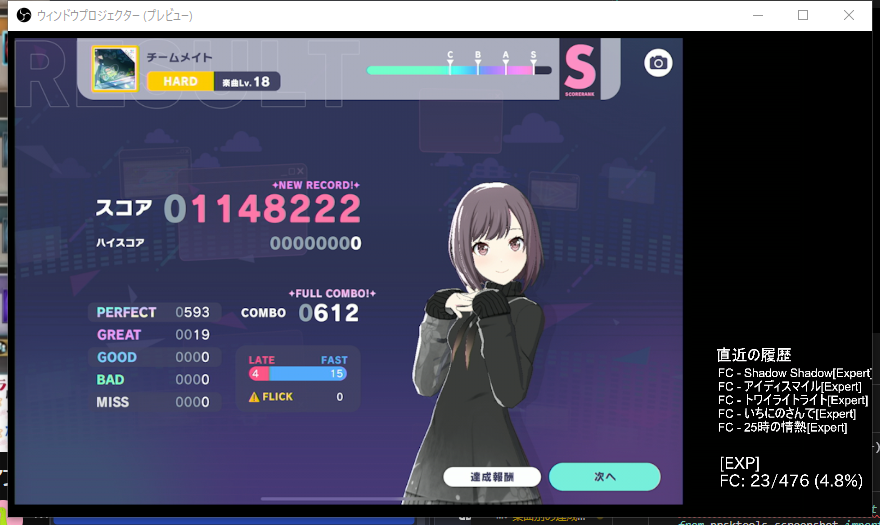

In [16]:
import pygetwindow as gw
from PIL import ImageGrab
import win32gui


window_title = "ウィンドウプロジェクター"

# ウィンドウを取得
windows = gw.getWindowsWithTitle(window_title)
if not windows:
    print("指定されたウィンドウが見つかりませんでした。")

print("a")

# 最初に見つかったウィンドウを使用
window = windows[0]

# ウィンドウの位置とサイズを取得
left, top, right, bottom = window.left, window.top, window.right, window.bottom

# スクリーンショットを取得
screenshot = ImageGrab.grab(bbox=(left, top, right, bottom))
screenshot

In [29]:
# ocr_input.py

import pytesseract
from PIL import Image
import re

# from achievement_manager import update_achievement
from prsktools.data_loader import load_songs_from_csv
from difflib import SequenceMatcher

# from manual_input import manual_input

# from screenshot import screenshot_from_window
# from file import get_latest_file


def ocr_input(image, crop_box=None, show_image=False):
    # 画像からテキストを抽出
    if crop_box:
        image = image.crop(crop_box)
    if show_image:
        image.show()

    print("テキスト認識中...")
    text = pytesseract.image_to_string(image, lang="jpn")
    text = re.sub(r"\s+", "", text)

    print("認識されたテキスト:", text)

    # 楽曲データをロードして確認
    songs_list = load_songs_from_csv()
    # print(songs_list)

    # 楽曲名の一致率を計算し、一致率が高い順にリスト化
    similarity_threshold = 0.6
    matched_songs = []
    for song in songs_list:
        similarity = SequenceMatcher(None, text, song["楽曲名"]).ratio()
        if similarity >= similarity_threshold:
            matched_songs.append((song, similarity))

    matched_songs.sort(key=lambda x: x[1], reverse=True)

    if not matched_songs:
        print("該当する楽曲が見つかりませんでした。")

    return matched_songs


image = Image.open("D:\My Documents\Video\Screenshot 2024-10-17 15-48-38.png")
cropped_image = image.crop((320, 12, 600, 48))
ocr_input(cropped_image)

テキスト認識中...
認識されたテキスト: アイディスマイル


[({'\ufeffNo': '91',
   'デフォ': '25005',
   '種別': '書',
   '楽曲名': 'アイディスマイル',
   'ﾕﾆｯﾄ': '5_25',
   'E': '7',
   'N': '12',
   'H': '17',
   'X': '25',
   'M': '28',
   'A': '26',
   'コンボ(EXP)': '0985',
   'コンボ(MAS)': '1247',
   'コンボ(APD)': '1216',
   '時間': '2:15',
   'BPM': '171',
   'MV': '2D/3D',
   '人数': '5',
   '配信日': '2021/04/19'},
  1.0)]

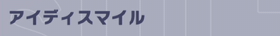

In [23]:
image.crop((320, 12, 600, 48))

In [11]:
windows[0].title

'ウィンドウプロジェクター (プレビュー)'

In [1]:
from prsktools.ocr_input import ocr_input_from_window
from prsktools.screenshot import screenshot_from_window


screenshot = screenshot_from_window("OBS", None, True)

ModuleNotFoundError: No module named 'achievement_manager'